In [4]:
# Convex Hull Analysis with Geometric Properties

"""
This notebook performs geometric analysis on a set of 2D points. It includes generating random points, sorting, computing convex hulls using divide-and-conquer, visualizing results, and calculating polygon properties such as area, perimeter, and closest/farthest point pairs.

Features:
- Random 2D point generation
- Sorting points based on angle (polar sorting)
- Convex Hull computation using:
  - Brute-force (for ≤5 points)
  - Divide-and-conquer (recursive merging)
- Polygon drawing and saving as PNG
- Area & Perimeter calculations
- Equable polygon check (area == perimeter)
- Closest and farthest point pair detection (O(n²))

Convex Hull Time Complexity:
- Divide-and-Conquer strategy
- Splitting takes O(log n)
- Merging convex hulls takes O(n)
- Overall: O(n log n)

Polygon Definitions:
- Convex Hull: The smallest convex polygon enclosing all given points.
- Equable Polygon: A polygon for which area == perimeter.
- Shoelace Formula: Used to compute area of a polygon.
"""


'\nThis notebook performs geometric analysis on a set of 2D points. It includes generating random points, sorting, computing convex hulls using divide-and-conquer, visualizing results, and calculating polygon properties such as area, perimeter, and closest/farthest point pairs.\n\nFeatures:\n- Random 2D point generation\n- Sorting points based on angle (polar sorting)\n- Convex Hull computation using:\n  - Brute-force (for ≤5 points)\n  - Divide-and-conquer (recursive merging)\n- Polygon drawing and saving as PNG\n- Area & Perimeter calculations\n- Equable polygon check (area == perimeter)\n- Closest and farthest point pair detection (O(n²))\n\nConvex Hull Time Complexity:\n- Divide-and-Conquer strategy\n- Splitting takes O(log n)\n- Merging convex hulls takes O(n)\n- Overall: O(n log n)\n\nPolygon Definitions:\n- Convex Hull: The smallest convex polygon enclosing all given points.\n- Equable Polygon: A polygon for which area == perimeter.\n- Shoelace Formula: Used to compute area of a

In [5]:
# (Imports and functions follow)

from random import randint
import numpy as np
import matplotlib.pyplot as plt
import math
from functools import cmp_to_key

# [1] Generate n random 2D points within range [mn, mx]
def generate_points(n, mn, mx):
    return [(randint(mn, mx), randint(mn, mx)) for _ in range(n)]


In [7]:
# [2] Define a function line(points, i, j) that finds the line between two points in a list.
def compute_line(points, i, j):
    Q = points[i]
    P = points[j]
    a = Q[1] - P[1]
    b = P[0] - Q[0]
    c = a * (P[0]) + b * (P[1])
    if b < 0:
        b = -1 * b
    line = f"{a}x + {b}y = {c}"
    return line


def get_x_y(points):
    return [point[0] for point in points], [point[1] for point in points]


def draw_points(points, color, filename):
    x, y = get_x_y(points)
    style = color + "o-"
    for i in range(len(x)):
        plt.plot(x[i:i + 2], y[i:i + 2], style)
    plt.plot([x[0], x[-1]], [y[0], y[-1]], style)
    plt.savefig(filename)
    plt.show()


def sort_points(points):
    def key(x):
        atan = math.atan2(x[1], x[0])
        return (atan, x[1] ** 2 + x[0] ** 2) if atan >= 0 else (2 * math.pi + atan, x[0] ** 2 + x[1] ** 2)
    return sorted(points, key=key)


def quad(p):
    if p[0] >= 0 and p[1] >= 0:
        return 1
    if p[0] <= 0 and p[1] >= 0:
        return 2
    if p[0] <= 0 and p[1] <= 0:
        return 3
    return 4


def orientation(a, b, c):
    res = (b[1] - a[1]) * (c[0] - b[0]) - (c[1] - b[1]) * (b[0] - a[0])
    if res == 0:
        return 0
    if res > 0:
        return 1
    return -1


def compare(p1, q1):
    p = [p1[0] - mid[0], p1[1] - mid[1]]
    q = [q1[0] - mid[0], q1[1] - mid[1]]
    one = quad(p)
    two = quad(q)
    if one != two:
        if one < two:
            return -1
        return 1
    if p[1] * q[0] < q[1] * p[0]:
        return -1
    return 1


def merger(a, b):
    n1, n2 = len(a), len(b)
    ia, ib = 0, 0
    for i in range(1, n1):
        if a[i][0] > a[ia][0]:
            ia = i
    for i in range(1, n2):
        if b[i][0] < b[ib][0]:
            ib = i
    inda, indb = ia, ib
    done = 0
    while not done:
        done = 1
        while orientation(b[indb], a[inda], a[(inda + 1) % n1]) >= 0:
            inda = (inda + 1) % n1
        while orientation(a[inda], b[indb], b[(n2 + indb - 1) % n2]) <= 0:
            indb = (indb - 1) % n2
            done = 0
    uppera, upperb = inda, indb
    inda, indb = ia, ib
    done = 0
    while not done:
        done = 1
        while orientation(a[inda], b[indb], b[(indb + 1) % n2]) >= 0:
            indb = (indb + 1) % n2
        while orientation(b[indb], a[inda], a[(n1 + inda - 1) % n1]) <= 0:
            inda = (inda - 1) % n1
            done = 0
    ret = []
    lowera, lowerb = inda, indb
    ind = uppera
    ret.append(a[uppera])
    while ind != lowera:
        ind = (ind + 1) % n1
        ret.append(a[ind])
    ind = lowerb
    ret.append(b[lowerb])
    while ind != upperb:
        ind = (ind + 1) % n2
        ret.append(b[ind])
    return ret


def bruteHull(a):
    global mid
    s = set()
    for i in range(len(a)):
        for j in range(i + 1, len(a)):
            x1, x2 = a[i][0], a[j][0]
            y1, y2 = a[i][1], a[j][1]
            a1, b1, c1 = y1 - y2, x2 - x1, x1 * y2 - y1 * x2
            pos, neg = 0, 0
            for k in range(len(a)):
                if k == i or k == j or (a1 * a[k][0] + b1 * a[k][1] + c1 <= 0):
                    neg += 1
                if k == i or k == j or (a1 * a[k][0] + b1 * a[k][1] + c1 >= 0):
                    pos += 1
            if pos == len(a) or neg == len(a):
                s.add(tuple(a[i]))
                s.add(tuple(a[j]))
    ret = []
    for x in s:
        ret.append(list(x))
    mid = [0, 0]
    n = len(ret)
    for i in range(n):
        mid[0] += ret[i][0]
        mid[1] += ret[i][1]
        ret[i][0] *= n
        ret[i][1] *= n
    ret = sorted(ret, key=cmp_to_key(compare))
    for i in range(n):
        ret[i] = [ret[i][0] / n, ret[i][1] / n]
    return ret


def divide(a):
    if len(a) <= 5:
        return bruteHull(a)
    left, right = [], []
    start = int(len(a) / 2)
    for i in range(start):
        left.append(a[i])
    for i in range(start, len(a)):
        right.append(a[i])
    left_hull = divide(left)
    right_hull = divide(right)
    return merger(left_hull, right_hull)


def convex_hull(points):
    sorted_points = sorted(points)
    ch = divide(sorted_points)
    return ch


def compute_area(points):
    area = 0.0
    n = len(points)
    j = n - 1
    x, y = get_x_y(points)
    for i in range(n):
        area += (x[j] + x[i]) * (y[j] - y[i])
        j = i
    return abs(area / 2.0)


def compute_perimeter(points):
    perimeter = 0.0
    n = len(points)
    x, y = get_x_y(points)
    j = n - 1
    for i in range(n):
        perimeter += math.sqrt((x[j] - x[i]) * (x[j] - x[i]) + (y[j] - y[i]) * (y[j] - y[i]))
        j = i
    return round(perimeter, 3)


def is_equable(points):
    return compute_area(points) == compute_perimeter(points)


def closest_pair(points):
    min_distance = float('inf')
    closest_points = None
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            p1, p2 = points[i], points[j]
            distance = math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)
            if distance < min_distance:
                min_distance = distance
                closest_points = (p1, p2)
    return closest_points, round(min_distance, 3)


def farthest_pairs(points):
    max_distance = 0
    farthest_points = None
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            p1, p2 = points[i], points[j]
            distance = math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)
            if distance > max_distance:
                max_distance = distance
                farthest_points = (p1, p2)
    return farthest_points, round(max_distance, 3)


def print_and_write(filename, *text):
    print(*text, file=open(filename, "a"))
    print(*text)

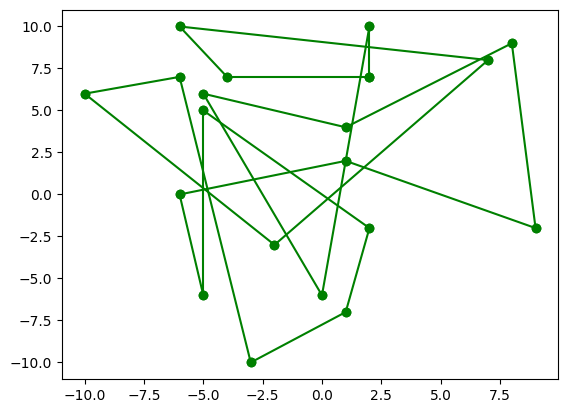

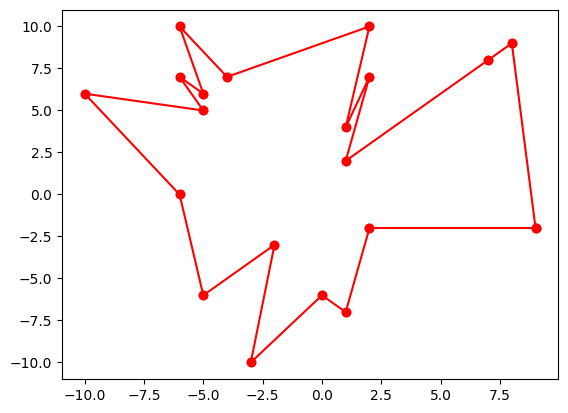

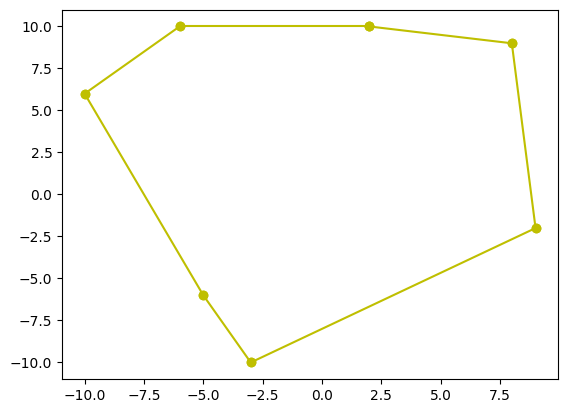

random points 20 [(-4, 7), (-6, 10), (7, 8), (-2, -3), (-10, 6), (-6, 7), (-3, -10), (1, -7), (2, -2), (-5, 5), (-5, -6), (-6, 0), (1, 2), (9, -2), (8, 9), (1, 4), (-5, 6), (0, -6), (2, 10), (2, 7)]
sorted points 20 [(8, 9), (7, 8), (1, 2), (2, 7), (1, 4), (2, 10), (-4, 7), (-6, 10), (-5, 6), (-6, 7), (-5, 5), (-10, 6), (-6, 0), (-5, -6), (-2, -3), (-3, -10), (0, -6), (1, -7), (2, -2), (9, -2)]
convex hull points 7 [[-6.0, 10.0], [-10.0, 6.0], [-5.0, -6.0], [-3.0, -10.0], [9.0, -2.0], [8.0, 9.0], [2.0, 10.0]]
area of convex hull 260.5
area of sorted points polygon 171.0
perimeter of convex hull 62.679
perimeter of sorted points polygon 101.596
is convex hull equable False
is sorted points polygon equable False
closest pair of points random (((-5, 5), (-5, 6)), 1.0)
closest pair of points sorted (((-5, 6), (-5, 5)), 1.0)
closest pair of points convex hull (([-5.0, -6.0], [-3.0, -10.0]), 4.472)
farthest pair of points random (((-3, -10), (8, 9)), 21.954)
farthest pair of points sorted ((

In [8]:
def main():
    assn = "assignment04"
    assn_txt_file = assn + ".txt"
    open(assn_txt_file, "w").close()

    points = generate_points(20, -10, 10)
    draw_points(points, "g", f"{assn}_random.png")
    points_sorted = sort_points(points)
    draw_points(points_sorted, "r", f"{assn}_sorted.png")
    ch = convex_hull(points)
    draw_points(ch, "y", f"{assn}_convex_hull.png")

    print_and_write(assn_txt_file, "random points", len(points), points)
    print_and_write(assn_txt_file, "sorted points", len(points_sorted), points_sorted)
    print_and_write(assn_txt_file, "convex hull points", len(ch), ch)

    print_and_write(assn_txt_file, "area of convex hull", compute_area(ch))
    print_and_write(assn_txt_file, "area of sorted points polygon", compute_area(points_sorted))

    print_and_write(assn_txt_file, "perimeter of convex hull", compute_perimeter(ch))
    print_and_write(assn_txt_file, "perimeter of sorted points polygon", compute_perimeter(points_sorted))
    print_and_write(assn_txt_file, "is convex hull equable", is_equable(ch))
    print_and_write(assn_txt_file, "is sorted points polygon equable", is_equable(points_sorted))

    print_and_write(assn_txt_file, "closest pair of points random", closest_pair(points))
    print_and_write(assn_txt_file, "closest pair of points sorted", closest_pair(points_sorted))
    print_and_write(assn_txt_file, "closest pair of points convex hull", closest_pair(ch))

    print_and_write(assn_txt_file, "farthest pair of points random", farthest_pairs(points))
    print_and_write(assn_txt_file, "farthest pair of points sorted", farthest_pairs(points_sorted))
    print_and_write(assn_txt_file, "farthest pair of points convex hull", farthest_pairs(ch))


if __name__ == "__main__":
    main()